In [4]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
%matplotlib inline
fac=cv2.CascadeClassifier("/home/atul//opencv-3.1.0/data/haarcascades/haarcascade_frontalface_default.xml")

In [5]:
import keras

Using TensorFlow backend.


In [6]:
import os

In [7]:
def load_path(folder):
    path=[]
    for i in os.listdir(folder):
        pt=os.path.join(folder,i)
        if pt is not None:
            path.append(pt)
    return path


In [8]:
def load_image(path):
    x=[]
    y=[]
    for name in path:
        img=io.imread(name,as_grey=True)
        x.append(img)
        label=int(os.path.split(name)[1].split(".")[0].replace("subject",""))-1
        y.append(label)
    return x,y

In [13]:
def load_crop(data):
    final=[]
    for img in data:
        key=fac.detectMultiScale(img)
        for (a,b,w,h) in key:
#        new=cv2.rectangle(img,(a,b),(a+w,b+h),(255,0,0),2)
            new=img[b:b+h,a:a+w]
        new=cv2.resize(new,(128,128))
        final.append(new)
        
    return final

In [14]:
img_path=load_path("yalefaces")
x,y=load_image(img_path)
x_final=load_crop(x)

In [15]:
x=np.array(x)
x_final=np.array(x_final)
y=np.array(y)

In [16]:
print (x.shape,x_final.shape)

(166, 243, 320) (166, 128, 128)


cv2.imshow('image',x_final[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

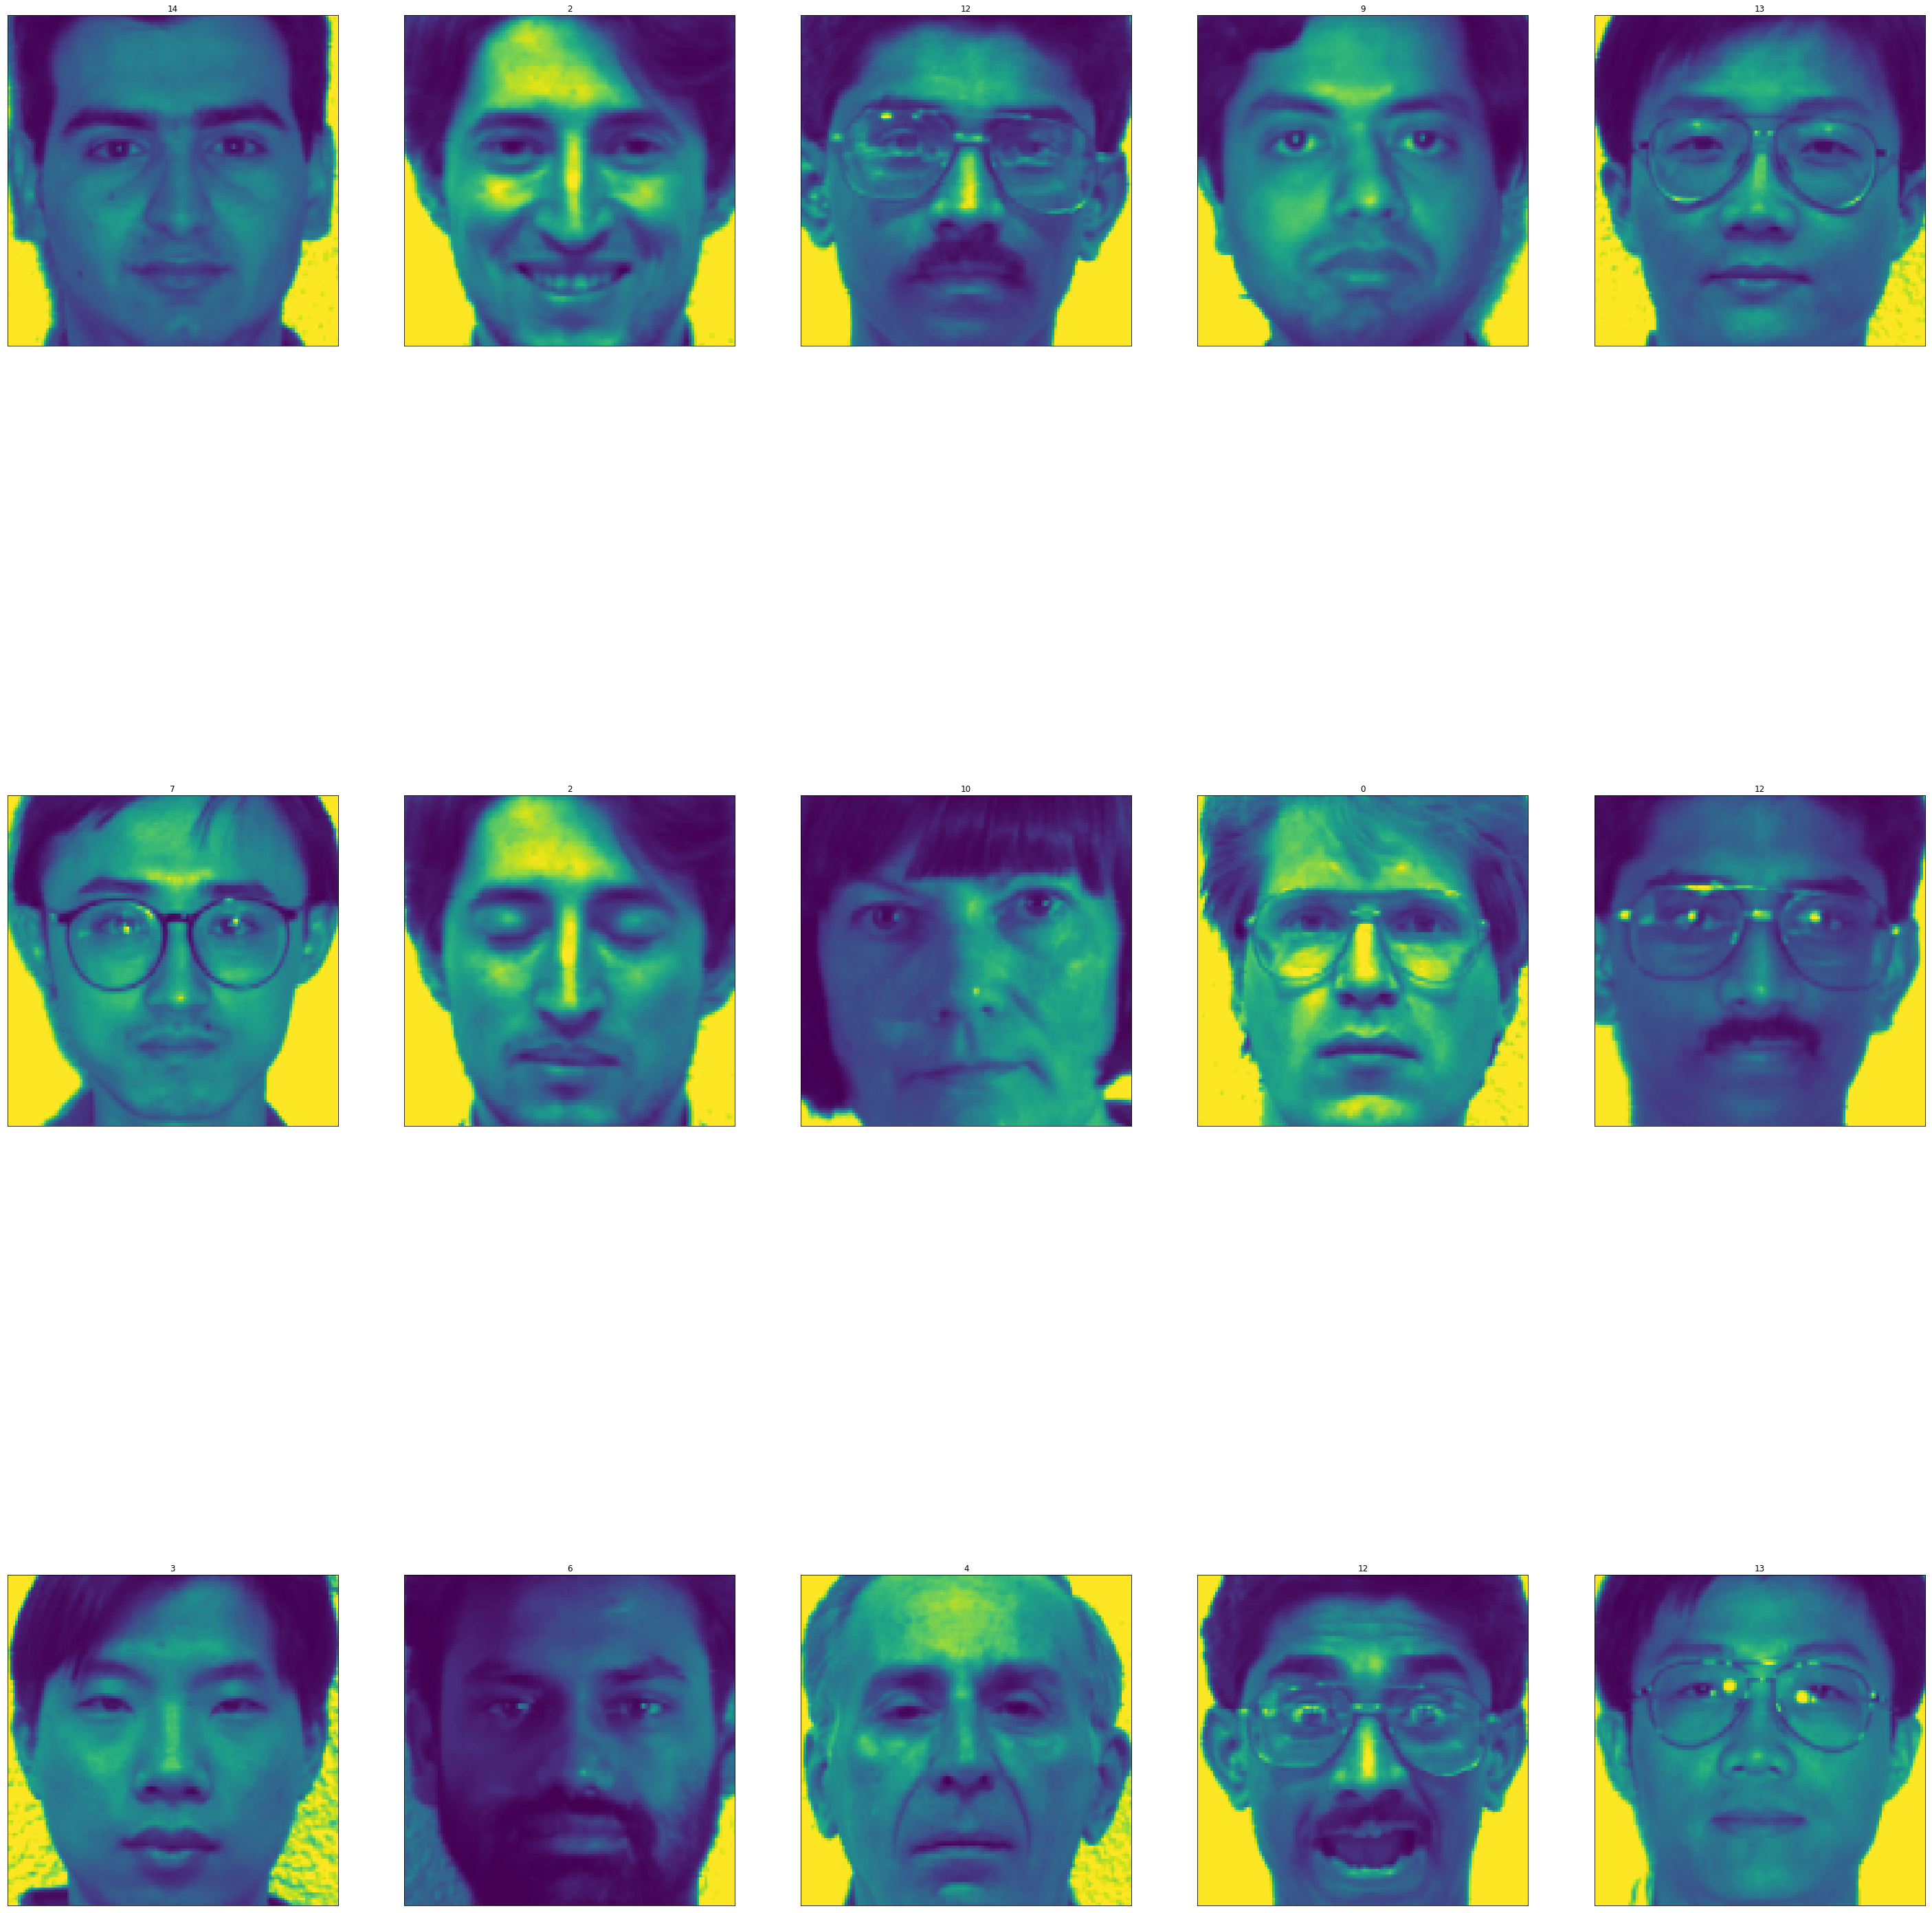

In [17]:
plt.figure(figsize=[50,80])
for i in range(1,16):
    plt.subplot(4,5,i)
    plt.imshow(x_final[i])
    plt.xticks([]), plt.yticks([]) 
    plt.title(y[i])

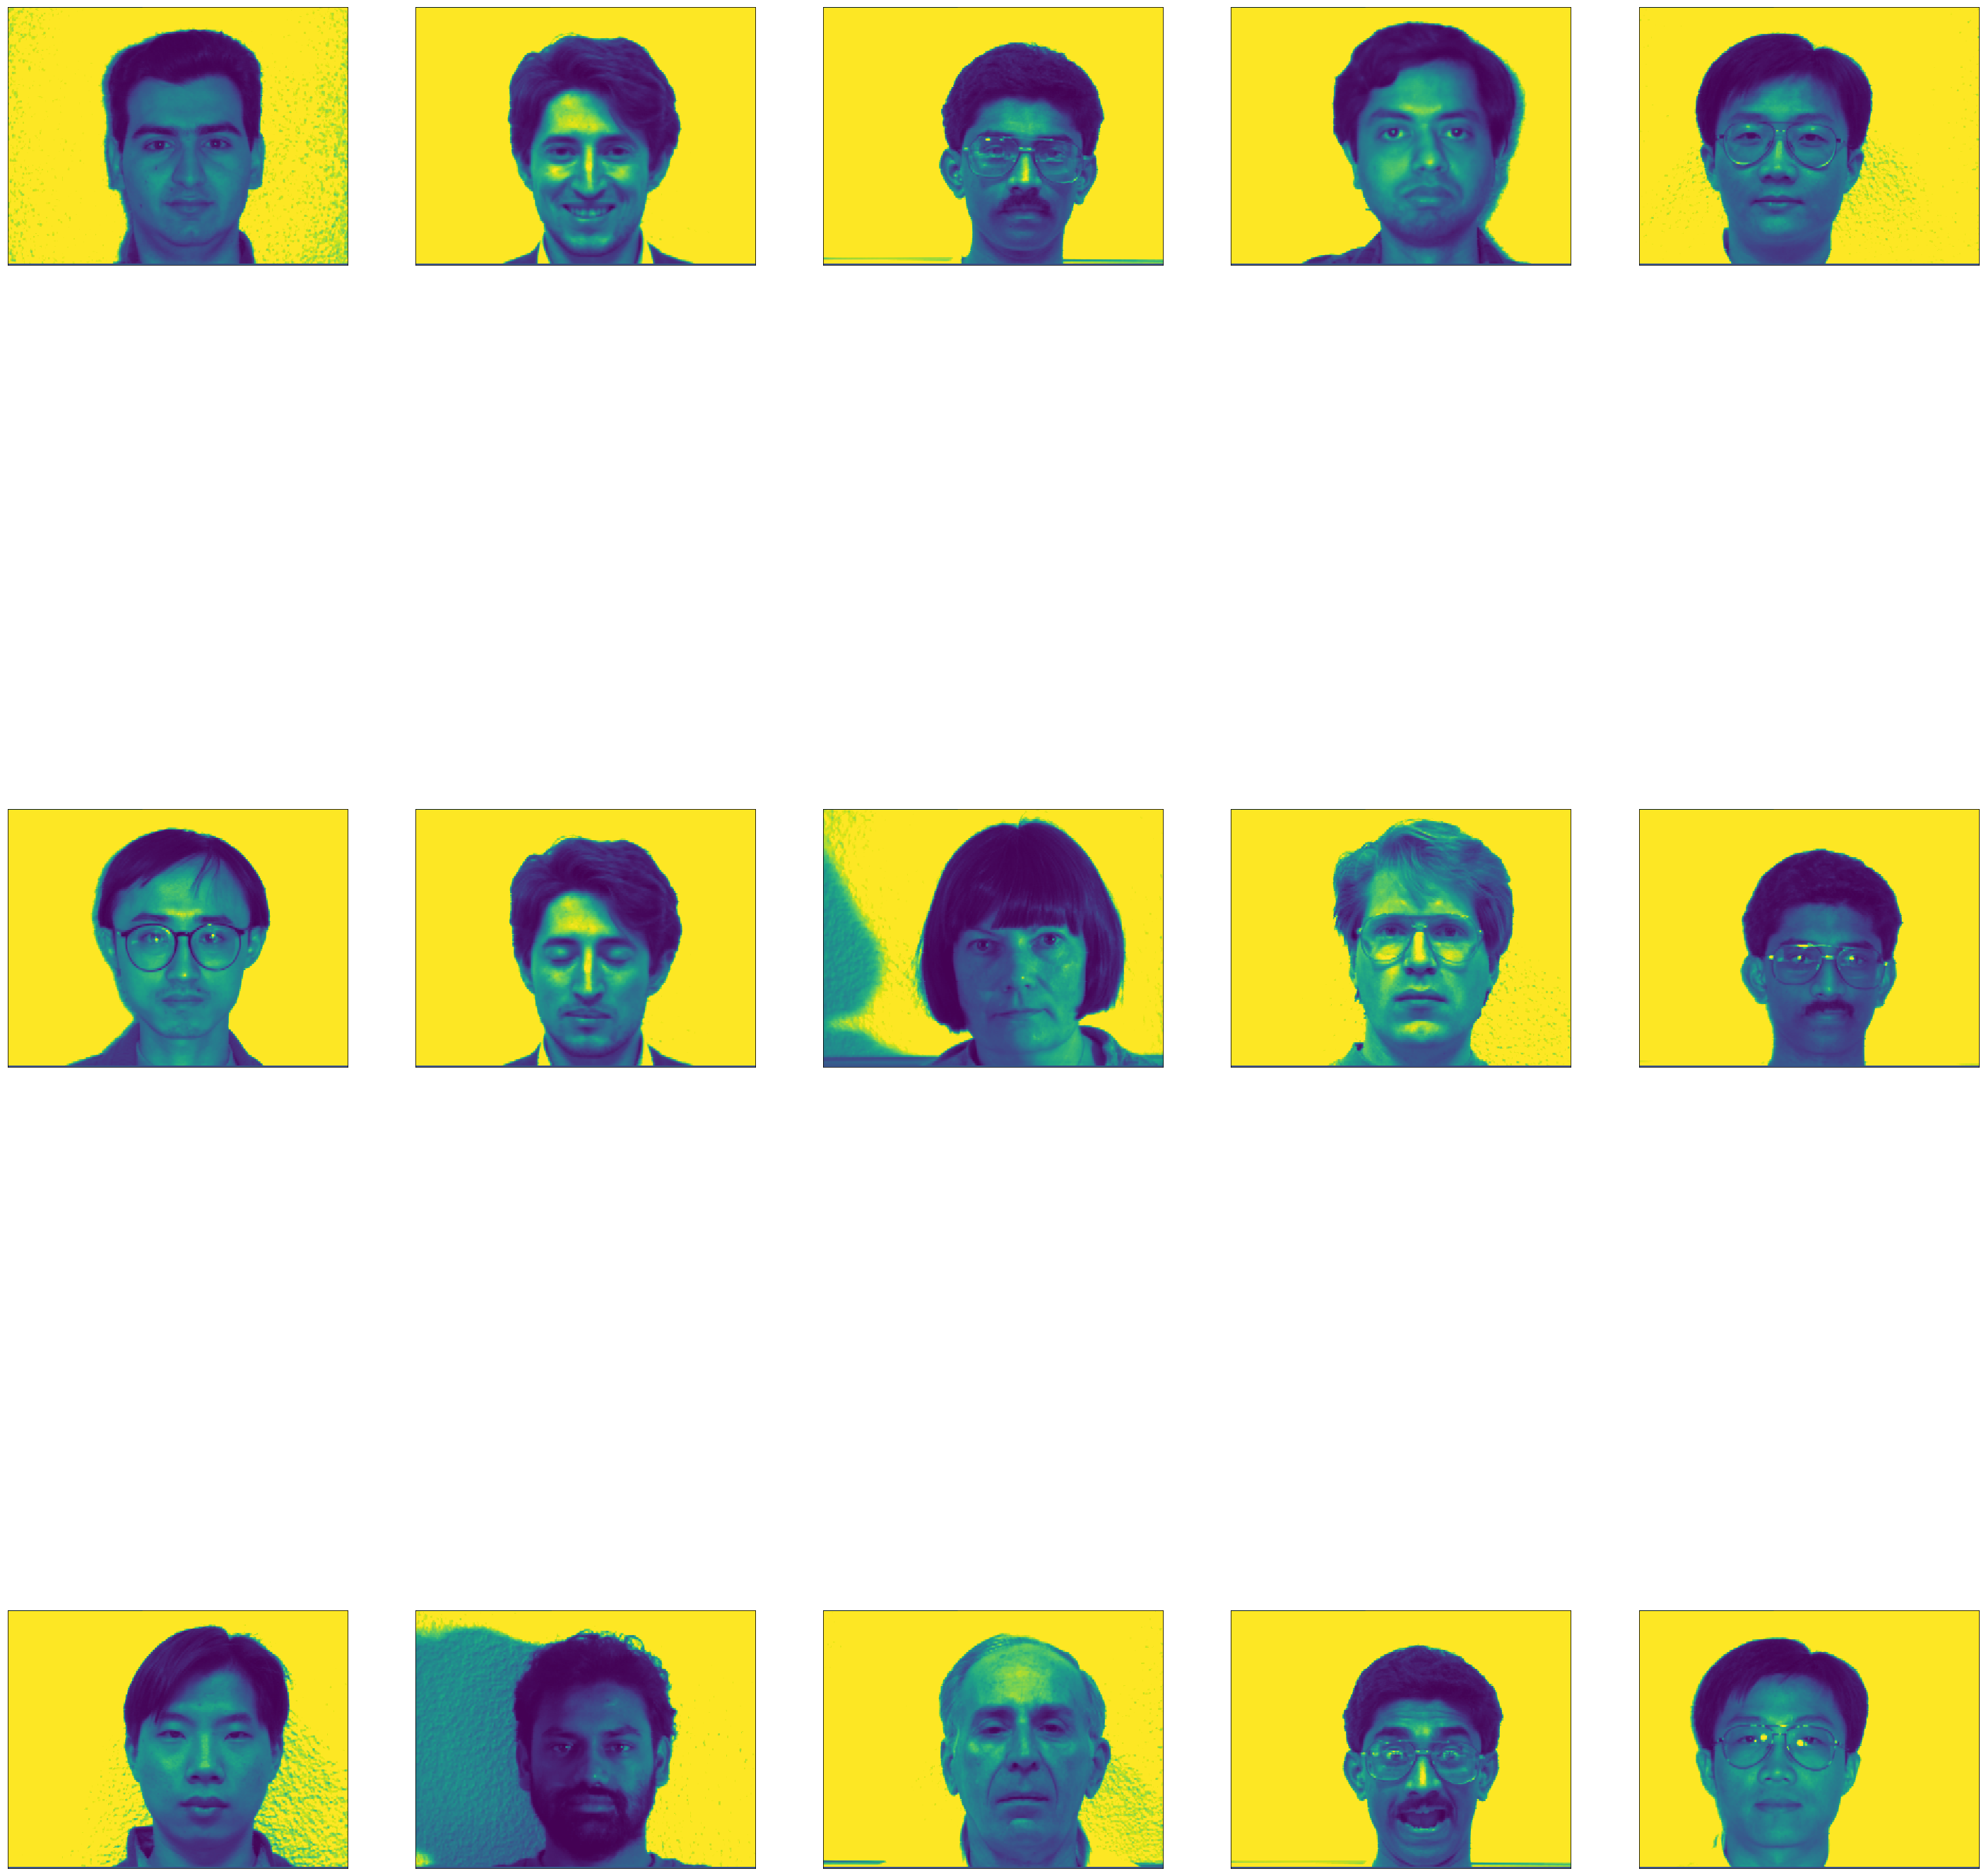

In [18]:
plt.figure(figsize=[50,80])
for i in range(1,16):
    plt.subplot(4,5,i)
    plt.imshow(x[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

In [19]:
q,w,e=x_final.shape
x_final=x_final.reshape(q,w,e,1)

In [20]:
x[1].shape

(243, 320)

In [21]:
ad=cv2.resize(x[1],(64,64))

In [22]:
ad.shape

(64, 64)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

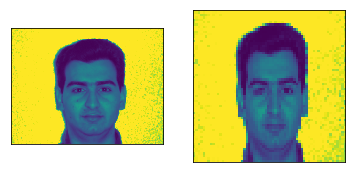

In [23]:
plt.subplot(1,2,1)
plt.imshow(x[1])
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(ad)
plt.xticks([]), plt.yticks([])

In [24]:
x_final.shape

(166, 128, 128, 1)

In [25]:
x.shape

(166, 243, 320)

In [26]:
y=pd.DataFrame(y,columns=["label"])

In [27]:
y_f=pd.get_dummies(y["label"])

In [28]:
x_final.shape

(166, 128, 128, 1)

In [29]:
y_final=y_f.values

In [30]:
y_final.shape

(166, 15)

In [50]:
x_final=x_final.astype("float32")
y_final=y_final.astype("float32")

In [51]:
x_final/=255
y_final/=255

In [52]:
x_final

array([[[[ 1.        ],
         [ 1.        ],
         [ 1.        ],
         ..., 
         [ 1.        ],
         [ 1.        ],
         [ 1.        ]],

        [[ 1.        ],
         [ 1.        ],
         [ 1.        ],
         ..., 
         [ 1.        ],
         [ 1.        ],
         [ 1.        ]],

        [[ 1.        ],
         [ 1.        ],
         [ 1.        ],
         ..., 
         [ 1.        ],
         [ 1.        ],
         [ 1.        ]],

        ..., 
        [[ 0.9254902 ],
         [ 0.95686275],
         [ 0.94901961],
         ..., 
         [ 0.74509805],
         [ 0.72156864],
         [ 0.67058825]],

        [[ 0.96470588],
         [ 0.98039216],
         [ 0.95686275],
         ..., 
         [ 0.80784315],
         [ 0.7764706 ],
         [ 0.72549021]],

        [[ 0.98823529],
         [ 1.        ],
         [ 0.99607843],
         ..., 
         [ 0.87058824],
         [ 0.80000001],
         [ 0.78039217]]],


       [[[ 0.29019

In [53]:
from keras.layers import Dense,Convolution2D,MaxPool2D,Dropout,Activation,Flatten
from keras.models import Sequential

In [54]:
model=Sequential()

In [55]:
model.add(Convolution2D(64,(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D((3,3),strides=(2, 2)))
model.add(Convolution2D(128,(3,3),activation="relu"))
model.add(MaxPool2D((3,3),strides=(2, 2)))
model.add(Convolution2D(256,(3,3),activation="relu"))
model.add(MaxPool2D((3,3),strides=(2, 2)))
model.add(Convolution2D(512,(3,3),activation="relu"))
model.add(MaxPool2D((3,3),strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation="softmax"))

In [56]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [57]:
model.fit(x_final,y_final,batch_size=32,epochs=50)

Epoch 1/50
166/166 [==============================] - 20s 120ms/step - loss: 0.0110 - acc: 0.0904
Epoch 2/50
166/166 [==============================] - 20s 118ms/step - loss: 0.0106 - acc: 0.0663
Epoch 3/50
166/166 [==============================] - 19s 117ms/step - loss: 0.0107 - acc: 0.0542
Epoch 4/50
166/166 [==============================] - 20s 117ms/step - loss: 0.0106 - acc: 0.0723
Epoch 5/50
166/166 [==============================] - 19s 117ms/step - loss: 0.0106 - acc: 0.0602
Epoch 6/50
166/166 [==============================] - 19s 117ms/step - loss: 0.0106 - acc: 0.0602
Epoch 7/50
166/166 [==============================] - 20s 122ms/step - loss: 0.0106 - acc: 0.0482
Epoch 8/50
166/166 [==============================] - 21s 125ms/step - loss: 0.0106 - acc: 0.0422
Epoch 9/50
166/166 [==============================] - 20s 123ms/step - loss: 0.0106 - acc: 0.0602
Epoch 10/50
166/166 [==============================] - 20s 119ms/step - loss: 0.0106 - acc: 0.0843
Epoch 11/50
166/166

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 512)       1180160   
__________

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
model.evaluate(x_final,y_final)

166/166 [==============================] - 6s 36ms/step


[0.00017365655584746973, 0.98795180722891562]

In [47]:
img= io.imread(img_path[0],as_grey=True)

/home/atul/kaggle/yalefaces/subject12.happy
/home/atul/kaggle/yalefaces/subject15.centerlight
/home/atul/kaggle/yalefaces/subject03.happy
/home/atul/kaggle/yalefaces/subject13.normal
/home/atul/kaggle/yalefaces/subject10.centerlight
/home/atul/kaggle/yalefaces/subject14.glasses
/home/atul/kaggle/yalefaces/subject08.centerlight
/home/atul/kaggle/yalefaces/subject03.sleepy
/home/atul/kaggle/yalefaces/subject11.rightlight
/home/atul/kaggle/yalefaces/subject01.glasses.gif
/home/atul/kaggle/yalefaces/subject13.centerlight
/home/atul/kaggle/yalefaces/subject04.noglasses
/home/atul/kaggle/yalefaces/subject07.rightlight
/home/atul/kaggle/yalefaces/subject05.normal
/home/atul/kaggle/yalefaces/subject13.surprised
/home/atul/kaggle/yalefaces/subject14.centerlight
/home/atul/kaggle/yalefaces/subject06.surprised
/home/atul/kaggle/yalefaces/subject03.surprised
/home/atul/kaggle/yalefaces/subject13.leftlight
/home/atul/kaggle/yalefaces/subject05.sleepy
/home/atul/kaggle/yalefaces/subject15.wink
/home

In [80]:
img=cv2.imread("path[2]",1)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

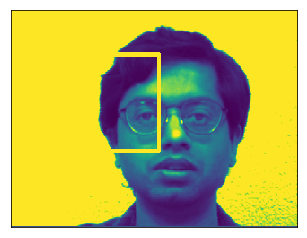

In [190]:
plt.imshow(x_final[98])
plt.xticks([]), plt.yticks([])

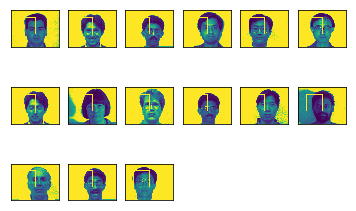

In [192]:
for i in range(1,16):
    plt.subplot(3,6,i)
    plt.imshow(x_final[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

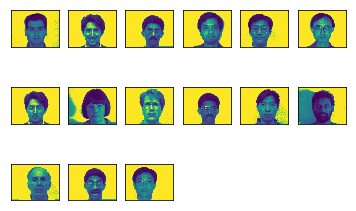

In [179]:
for i in range(1,16):
    plt.subplot(3,6,i)
    plt.imshow(x[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

In [144]:
print (img)

[[110 117 121 ..., 251 231 241]
 [250 255 255 ..., 249 243 252]
 [255 255 255 ..., 255 255 255]
 ..., 
 [243 255 255 ..., 167 156 160]
 [246 255 255 ..., 171 153 154]
 [ 68  68  68 ...,  68  68  68]]


In [33]:
img=cv2.imread("im1.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [16]:
face=fac.detectMultiScale(gray, 1.3, 5)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215) !empty() in function detectMultiScale


In [4]:
face=face_cascade.detectMultiScale(gray, 1.3, 5)
print (face)
for (x,y,w,h) in face:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


SyntaxError: invalid syntax (<ipython-input-4-f022453e6088>, line 2)